## Load in the data set

(As in the univariate case.) Start by loading in the Wine data set.
There are 178 data points, each with 13 features and a label (1,2,3).
We will divide these into a training set of 130 points and a test set of 48 points.

In [1]:
# Standard includes
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Useful module for dealing with the Gaussian density
from scipy.stats import norm, multivariate_normal 
# Now load "wine.data.txt" data set.
# This needs to be in the same directory
# 178 lines, each with one point. First value is the label (1,2,3), remaining 13 numbers are features
data = np.loadtxt('wine.data.txt', delimiter=',')
# Names of features
featurenames = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash','Magnesium', 'Total phenols', 
                'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 
                'OD280/OD315 of diluted wines', 'Proline']
perm = np.array([  4,  93, 103, 152,  77,  81,  14,  58, 139,  53,  40, 167,  20,
        80, 130,  16, 110, 158,  42, 135,   8,  69, 153,  94,  91,  51,
       117, 146,  72, 142, 137,  88, 165, 106,  33,  67, 133, 113, 171,
       129, 141,  21,  12,  44,   3, 164, 169,  41,   6, 177,  17, 174,
       104, 176, 168,  26, 173, 122, 159, 111, 163,  50,  15,  37, 114,
         2, 109,  68,  39,  96,  36, 149, 151, 124, 156, 108, 107,  30,
        43,  28,  54,  59, 154,  78,  92, 157, 140,  73,  34,  49, 160,
       118, 125, 126, 127, 145, 144,   9,  24,  90,  84,  55,  19, 148,
        25,  61, 123,   0,  38,  97,  32,  85,  29,  45, 128,  75,  66,
        86,  47, 102, 175,  63,  82,  83, 115, 136,  98,  46,  62, 150,
       162, 134, 138,  76,  87, 170, 105,  65,  89,  71, 112,  56,  74,
       132, 100,  27,  64, 166,  22, 155,  57, 119,  99,   7,  23,  13,
       121, 101, 116, 172,  95, 131,  10,  35,  11,  60, 161,   1,  18,
       147, 143,  31,  79,  48,   5, 120,  52,  70])
# Split 178 instances into training set (x, y) of size 130 and test set (tx, ty) of size 48
# Also split apart data and labels
# perm = np.random.permutation(178)
x = data[perm[0:130],1:14]
y = data[perm[0:130],0]
tx = data[perm[130:178], 1:14]
ty = data[perm[130:178],0]

In [2]:
# installing packages for interactive graphs
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider

## Look at the distribution of two features from one of the wineries

This time we'll use two features: 'Alcohol' (feature #0) and 'Flavanoids' (feature #6). 

In [3]:
# Fit a Gaussian to a data set using the selected features
def fit_gaussian(x, features):
    mu = np.mean(x[:,features], axis=0)
    covar = np.cov(x[:,features], rowvar=0, bias=1)
    return mu, covar

Fit a Gaussian to label 1, using just these two features. Show the parameters of the Gaussian.

In [4]:
f1 = 0
f2 = 6
features = [f1, f2]
label = 1
mu, covar = fit_gaussian(x[y==label,:], features)
print "Mean:\n" + str(mu)
print "Covariance matrix:\n" + str(covar)

Mean:
[ 13.72023256   2.96348837]
Covariance matrix:
[[ 0.20046739  0.05571779]
 [ 0.05571779  0.12084132]]


Now display the training points for label 1, restricted to the two selected features.
Also show a few contour lines of the Gaussian fit.

In [5]:
@interact_manual( f1=IntSlider(0,0,12,1), f2=IntSlider(6,0,12,1), label=IntSlider(1,1,3,1) )
def twoFeaturesPlot(f1,f2,label):
    # Setting up variables
    if f1 == f2: #<-- if f1 == f2 then then we would get an error
        print "Please choose different features for f1 and f2."
        return  
    features = [f1, f2]
    mu, covar = fit_gaussian(x[y==label,:], features)
    
    # Plot the training points along the two selected features
    plt.plot(x[y==label,f1], x[y==label,f2], 'ro')
    plt.xlabel(featurenames[f1], fontsize=14, color='red')
    plt.ylabel(featurenames[f2], fontsize=14, color='red')
    # For the plot: obtain limits along the x1-axis and x2-axis
    x1_lower = min(x[y==label,f1])
    x1_upper = max(x[y==label,f1])
    x1_width = x1_upper - x1_lower
    x1_lower = x1_lower - 0.2 * x1_width
    x1_upper = x1_upper + 0.2 * x1_width
    x2_lower = min(x[y==label,f2])
    x2_upper = max(x[y==label,f2])
    x2_width = x2_upper - x2_lower
    x2_lower = x2_lower - 0.2 * x2_width
    x2_upper = x2_upper + 0.2 * x2_width
    plt.xlim(x1_lower, x1_upper)
    plt.ylim(x2_lower, x2_upper)
    
    # Finally, plot a contour of the Gaussian
    res = 200 # resolution
    xg = np.linspace(x1_lower, x1_upper, res)
    yg = np.linspace(x2_lower, x2_upper, res)
    z = np.zeros((res,res))
    rv = multivariate_normal(mean=mu, cov=covar)
    
    for i in range(0,res):
        for j in range(0,res):
            z[j,i] = rv.logpdf([xg[i], yg[j]]) 
    sign, logdet = np.linalg.slogdet(covar)
    normalizer = -0.5 * (2 * np.log(6.28) + sign * logdet)
    for offset in range(0,4):
        plt.contour(xg,yg,z, levels=[normalizer - offset], colors='k', linewidths=2.0, linestyles='solid')
    # Finally, display
    plt.show()

### <font color="magenta">*Fast Exercise*</font>

Try changing the features and labels in the graph to see how the graph changes. Can you guess what the graph would look like if f1 and f2 were the same feature? Do you think it would look <font color="blue">"random"</font>, <font color="blue">"linear"</font>, or a <font color="blue">"single_dot"</font>?

Write a function, **sameFeatureGraph**, that returns the type of graph you believe you would see from plotting the same feature on the x and y axis.

In [6]:
# modify this cell

def sameFeatureGraph():
    # inputs: no inputs
    # output: return either "random", "linear", or "single_dot"
    
    ### BEGIN SOLUTION
    return "linear"
    ### END SOLUTION

In [7]:
assert sameFeatureGraph() == "linear"

## Fit a Gaussian to each class

Let's define a function that will fit a Gaussian generative model to the three classes.

In [8]:
# Assumes y takes on values 1,2,3
def fit_generative_model(x, y, features):
    k = 3 # number of classes
    d = len(features) # number of features
    mu = np.zeros((k+1,d)) # list of means
    covar = np.zeros((k+1,d,d)) # list of covariance matrices
    pi = np.zeros(k+1) # list of class weights
    for label in range(1,k+1):
        indices = (y==label)
        mu[label,:], covar[label,:,:] = fit_gaussian(x[indices,:], features)
        pi[label] = float(sum(indices))/float(len(y))
    return mu, covar, pi

Call this function on the features 'alcohol' and 'flavanoids'.

In [9]:
f1 = 0 # alcohol
f2 = 6 # flavanoids
features = [f1,f2] 
mu, covar, pi = fit_generative_model(x, y, features)

Let's look at the means of the three classes

In [10]:
mu

array([[  0.        ,   0.        ],
       [ 13.72023256,   2.96348837],
       [ 12.29215686,   2.05254902],
       [ 13.15777778,   0.79972222]])

Next, display the Gaussian distribution for each of the three classes.

We start with a little helper function that is used to find the range in which each feature's values lie.

In [11]:
# Find the range within which an array of numbers lie, with a little buffer
def find_range(x):
    lower = min(x)
    upper = max(x)
    width = upper - lower
    lower = lower - 0.2 * width
    upper = upper + 0.2 * width
    return lower, upper

Now for the main plotting routine.

In [12]:
@interact_manual( f1=IntSlider(0,0,12,1), f2=IntSlider(6,0,12,1) )
def threeGaussiansPlot(f1,f2):
    # Setting up variables
    if f1 == f2: #<-- if f1 == f2 then then we would get an error
        print "Please choose different features for f1 and f2."
        return  
    features = [f1,f2] 
    mu, covar, pi = fit_generative_model(x, y, features)
    
    # Show the Gaussian fit to each class, using features f1,f2
    col = ['r', 'k', 'g']
    # Find rough ranges along each feature
    x1_lower, x1_upper = find_range(x[:,f1])
    x2_lower, x2_upper = find_range(x[:,f2])
    plt.xlim(x1_lower,x1_upper)
    plt.ylim(x2_lower,x2_upper)
    # Plot the training points along the two selected features
    plt.plot(x[y==1,f1], x[y==1,f2], 'ro')
    plt.plot(x[y==2,f1], x[y==2,f2], 'k^')
    plt.plot(x[y==3,f1], x[y==3,f2], 'gs')
    plt.xlabel(featurenames[f1], fontsize=14, color='red')
    plt.ylabel(featurenames[f2], fontsize=14, color='red')
    # Now draw a contour line for each label's Gaussian
    res = 200
    d = float(len(features))
    xg = np.linspace(x1_lower,x1_upper,res)
    yg = np.linspace(x2_lower,x2_upper,res)
    z = np.zeros((res,res))
    for label in range(1,4):
        gmean = mu[label,:]
        gcov = covar[label,:,:]
        rv = multivariate_normal(mean=gmean, cov=gcov)
        for i in range(0,res):
            for j in range(0,res):
                 z[j,i] = rv.logpdf([xg[i], yg[j]]) 
        sign, logdet = np.linalg.slogdet(gcov)
        normalizer = -0.5 * (d * np.log(6.28) + sign * logdet)
        plt.contour(xg,yg,z,levels=[normalizer - 4.0],colors=col[label-1],linewidths=2.0,linestyles='solid')
    # Finally, display
    plt.show()

### <font color="magenta">*Fast Exercise*</font>

Try running the gaussian plots for different features.

## Prediction time

How well we can predict the class (1,2,3) based just on these two features?

We start with a testing procedure that is analogous to what we developed in the 1-d case.

In [13]:
# Now test the performance of a predictor based on a subset of features
@interact( f1=IntSlider(0,0,12,1), f2=IntSlider(6,0,12,1) )
def test_model(f1, f2):
    # Setting up variables
    if f1 == f2: #<-- if f1 == f2 then then we would get an error
        print "Please choose different features for f1 and f2."
        return  
    features= [f1,f2]
    mu, covar, pi = fit_generative_model(x, y, features)
    
    k = 3 # Labels 1,2,...,k
    nt = len(ty) # Number of test points
    score = np.zeros((nt,k+1))
    for i in range(0,nt):
        for label in range(1,k+1):
            score[i,label] = np.log(pi[label]) + \
            multivariate_normal.logpdf(tx[i,features], mean=mu[label,:], cov=covar[label,:,:])
    predictions = np.argmax(score[:,1:4], axis=1) + 1
    # Finally, tally up score
    errors = np.sum(predictions != ty)
    print "Test error using feature(s): ",
    for f in features:
        print "'" + featurenames[f] + "'" + " ",
    print
    print "Errors: " + str(errors) + "/" + str(nt)# Now test the performance of a predictor based on a subset of features

### <font color="magenta">*Fast Exercise*</font>

Look at other pairs of features, and see what kinds of test errors result. Which feature, whe combined with <font color="blue">"Magnesuim"</font>, produces the smallest `Test error` ?

Write a function, **MagnesiumAndWhat**, that returns the name of the feature to the question above.

In [14]:
# modify this cell

def MagnesiumAndWhat():
    # inputs: no inputs
    # output: return a feature name, like: 'Alcohol', 'Flavanoids', or 'Color intensity'
    
    ### BEGIN SOLUTION
    return "Flavanoids"
    ### END SOLUTION

In [15]:
assert MagnesiumAndWhat() == 'Flavanoids'

## The decision boundary 

This draws the decision boundary between the three classes, as found above. It takes a few minutes to do all its calculations.


This code is done for f1=0 [Alcohol] and f2=6 [Flavanoids]


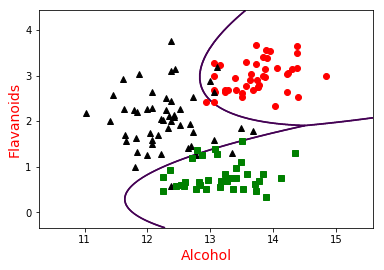

In [16]:
# Setup variables
print "This code is done for f1=0 [Alcohol] and f2=6 [Flavanoids]"
f1, f2 = 0, 6
features = [f1,f2] 
mu, covar, pi = fit_generative_model(x, y, features)
x1_lower, x1_upper = find_range(x[:,f1])      #  <--  Finds rough ranges along each feature
x2_lower, x2_upper = find_range(x[:,f2])

# Plot the decision boundary for a classifier based only on the two selected features
delta = 0.005
x1 = np.arange(x1_lower,x1_upper,delta)
x2 = np.arange(x2_lower,x2_upper,delta)
rv1 = multivariate_normal(mean=mu[1,:], cov = covar[1,:,:])
rv2 = multivariate_normal(mean=mu[2,:], cov = covar[2,:,:])
rv3 = multivariate_normal(mean=mu[3,:], cov = covar[3,:,:])
Z1 = np.zeros((len(x1),len(x2)))
Z2 = np.zeros((len(x1),len(x2)))
Z3 = np.zeros((len(x1),len(x2)))
for i in range(0,len(x1)):
    for j in range(0,len(x2)):
        v1 = np.log(pi[1]) + rv1.logpdf([x1[i],x2[j]])
        v2 = np.log(pi[2]) + rv2.logpdf([x1[i],x2[j]])
        v3 = np.log(pi[3]) + rv3.logpdf([x1[i],x2[j]])
        m = max([v1,v2,v3])
        Z1[i,j] = v1 - m
        Z2[i,j] = v2 - m
        Z3[i,j] = v3 - m
plt.plot(x[y==1,f1], x[y==1,f2], 'ro')
plt.plot(x[y==2,f1], x[y==2,f2], 'k^')
plt.plot(x[y==3,f1], x[y==3,f2], 'gs')
plt.xlabel(featurenames[f1], fontsize=14, color='red')
plt.ylabel(featurenames[f2], fontsize=14, color='red')
plt.contour(x1,x2,Z1.T,[-0.001])
plt.contour(x1,x2,Z2.T,[-0.001])
plt.contour(x1,x2,Z3.T,[-0.001])
plt.xlim([x1_lower,x1_upper])
plt.ylim([x2_lower,x2_upper])
plt.show()

### <font color="magenta">*Fast Exercise*</font>

Can you plot the above diagram, but with test data instead of training data? After creating the graph look to see how many errors there are. This should be the same as the test error we calculated earlier.

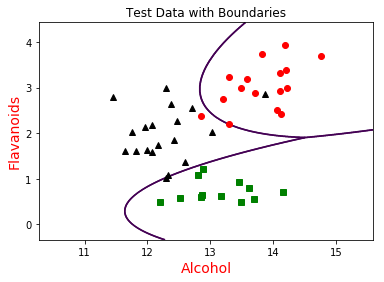

In [17]:
### You only need to slightly modify these lines
plt.plot(x[y==1,f1], x[y==1,f2], 'ro')
plt.plot(x[y==2,f1], x[y==2,f2], 'k^')
plt.plot(x[y==3,f1], x[y==3,f2], 'gs')
###

plt.xlabel(featurenames[f1], fontsize=14, color='red')
plt.ylabel(featurenames[f2], fontsize=14, color='red')
plt.contour(x1,x2,Z1.T,[-0.001])
plt.contour(x1,x2,Z2.T,[-0.001])
plt.contour(x1,x2,Z3.T,[-0.001])
plt.title("Test Data with Boundaries")
plt.xlim([x1_lower,x1_upper])
plt.ylim([x2_lower,x2_upper])
plt.show()

Write the function, **numberWrong**, which returns the number of incorrectly predicted test points.

In [18]:
# modify this cell

def numberWrong():
    # inputs: no inputs
    # output: return an integer
    
    ### BEGIN SOLUTION
    return 4
    ### END SOLUTION

In [19]:
assert numberWrong() == 4